<a href="https://colab.research.google.com/github/marekcrn/MLF/blob/main/Project-mini/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [29]:
dataset = pd.read_csv('drive/MyDrive/Data_prepared_final.csv')
dataset

,Unnamed: 0,time [s],cfo_meas,cfo_demod,gain_imb,iq_imb,or_off,quadr_err,ph_err,mag_err,evm
0,0,45181.524,-414,-421.076324,0.076097,-46.987598,-27.219631,0.104362,1.129778,0.440299,2.059935
1,1,45182.129,-414,-423.571686,0.069879,-47.852627,-26.934967,0.053158,1.050010,0.431240,1.815053
2,2,45182.550,-414,-421.033936,0.061466,-48.968697,-27.130722,-0.045913,0.989473,0.447790,1.762053
3,3,45182.971,-414,-420.103546,0.078836,-46.756973,-27.005318,0.081583,1.085091,0.443476,1.894204
4,4,45183.551,-432,-420.781097,0.066053,-47.048218,-27.358521,0.081920,1.023701,0.465225,1.805841
...,...,...,...,...,...,...,...,...,...,...,...
19195,19195,54245.724,216,215.584991,0.077551,-35.409054,-28.611925,1.875334,0.999375,1.427339,2.248822
19196,19196,54246.340,216,215.247406,0.044961,-35.508205,-27.954048,1.898758,1.031501,1.478366,2.320668
19197,19197,54246.770,216,216.761307,0.070066,-35.038486,-28.467575,2.015116,1.090227,1.468599,2.382019
19198,19198,54247.379,216,215.353516,0.048611,-35.413639,-28.528139,1.916172,0.999381,1.497681,2.283976


In [41]:
def elbow(n_components: int):

    # Standardize the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Apply PCA for feature reduction
    pca = PCA(n_components=n_components)  # Reduce to 5 principal components
    X_pca = pca.fit_transform(X_scaled)

    # Apply the elbow method to find the optimal k (number of clusters)
    wcss = []

    # Repeat K-means for different values of k (number of clusters)
    for k in range(2, 20):
        kmeans = KMeans(n_clusters=k, init='random', random_state=0, n_init='auto')
        kmeans.fit(X_pca)
        wcss.append(kmeans.inertia_)

    # Plot the elbow curve
    plt.figure(figsize=(10, 6))
    plt.plot(range(2, 20), wcss, marker='o', linestyle='--')
    plt.title('Elbow Method for PCA = ' + str(n_components))
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.xticks(range(1, 20))
    plt.grid(True)
    plt.show()

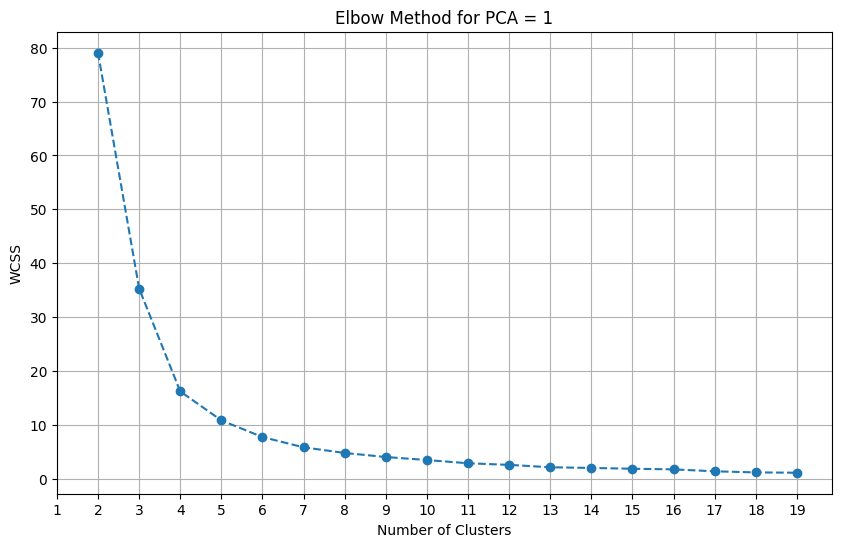

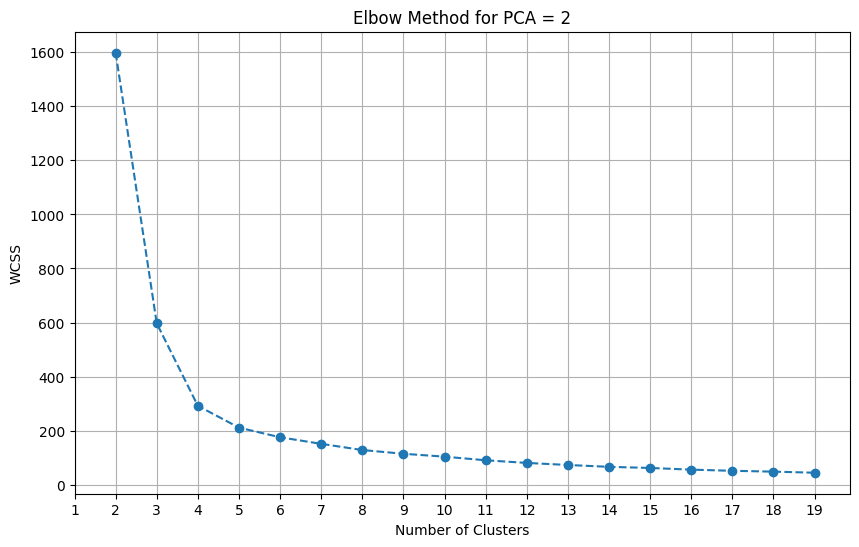

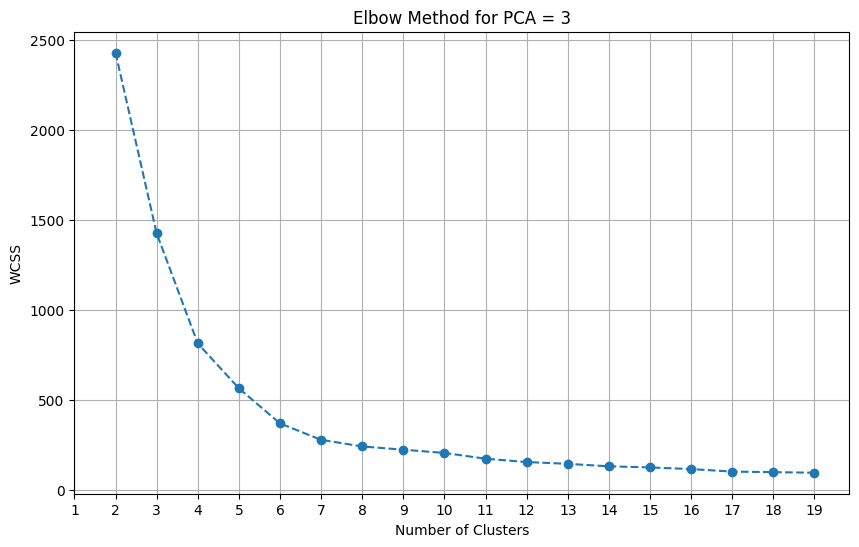

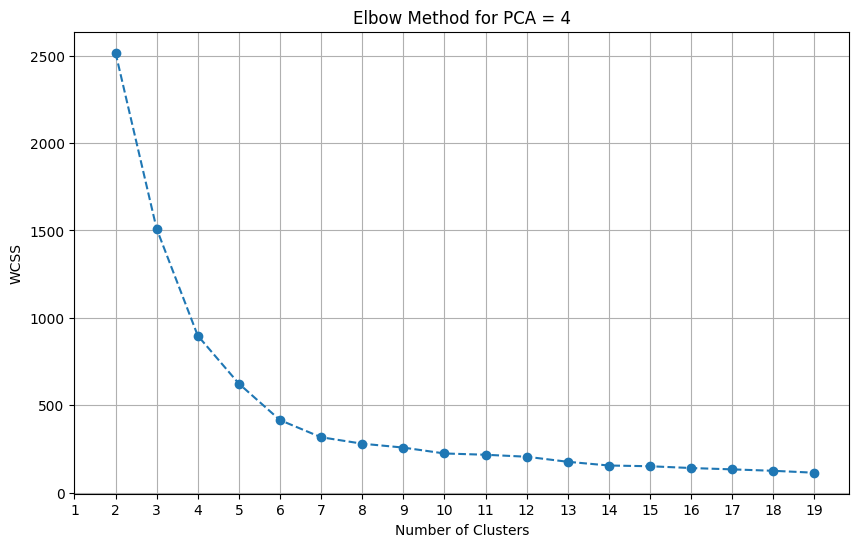

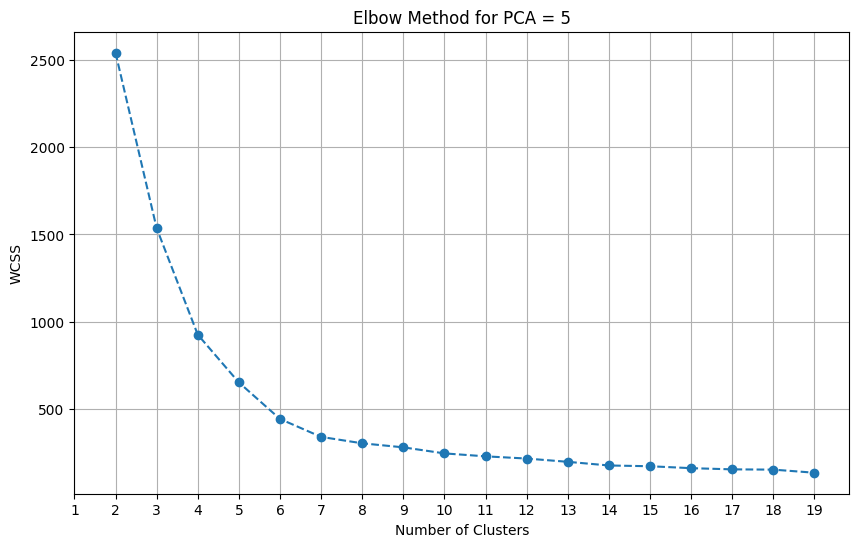

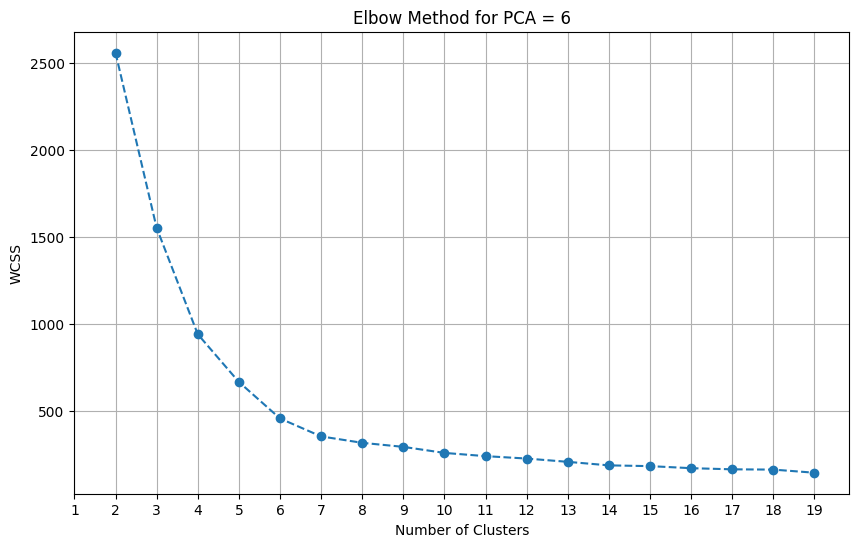

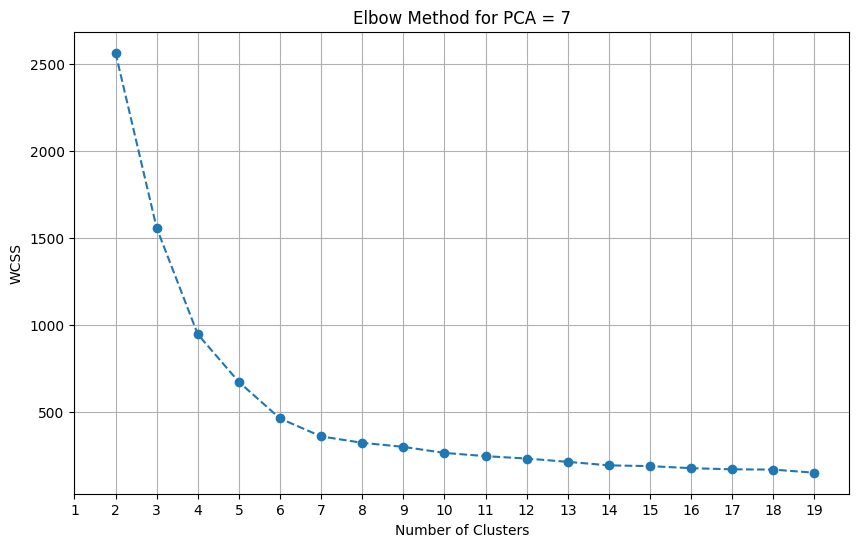

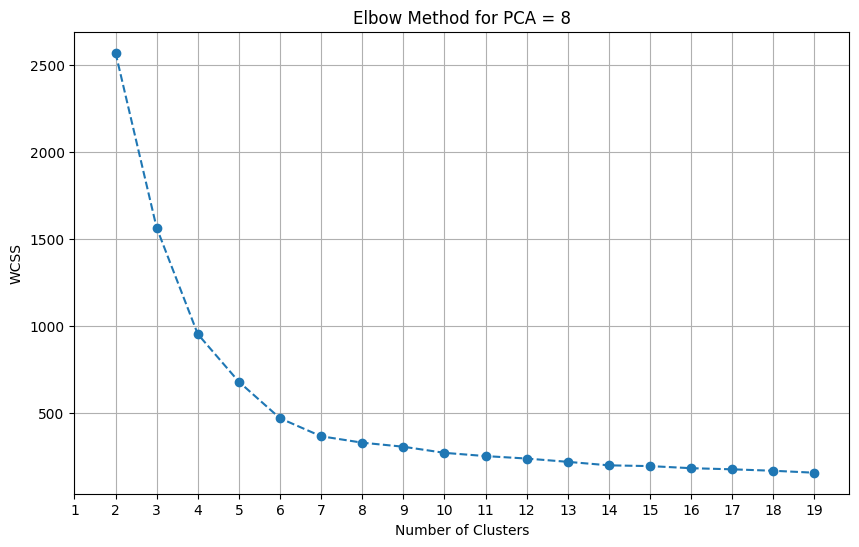

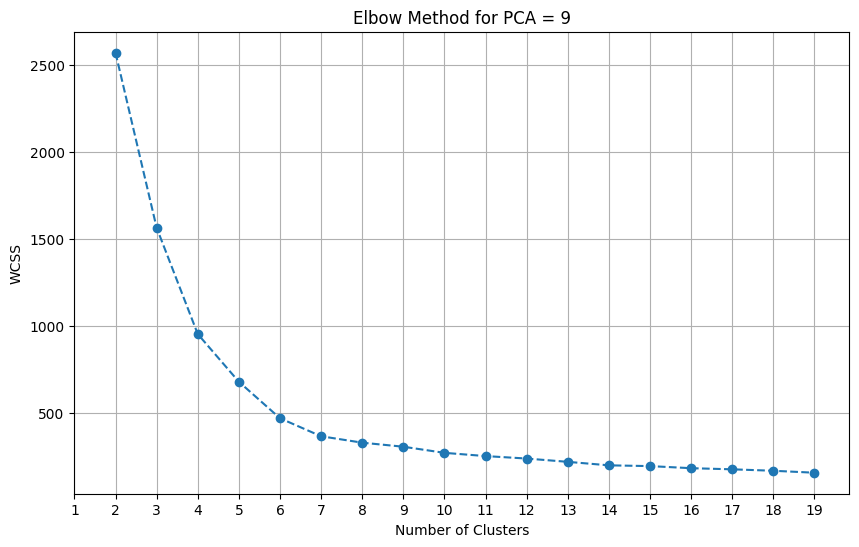

In [40]:
# Perform data preprocessing for measured data
X = dataset[['cfo_meas', 'cfo_demod', 'gain_imb', 'iq_imb', 'or_off', 'quadr_err', 'ph_err', 'mag_err', 'evm']]

for i in range(1,10):
    elbow(i)